In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import models, layers
import os

In [2]:
pwd = os.getcwd()
pwd

'C:\\Users\\223102397\\Documents\\Deep Learning\\tomatoes-disease\\training'

In [3]:
BATCH_SIZE = 68
IMAGE_SIZE = 256
CHANNELS = 3


In [4]:
dataset = tf.keras.preprocessing.image_dataset_from_directory('TomatoesImagesFull',shuffle=True, image_size=(IMAGE_SIZE,IMAGE_SIZE),batch_size=68, seed = 123)

Found 16011 files belonging to 10 classes.


In [5]:
len(dataset)

236

In [6]:
class_names= dataset.class_names
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [7]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(68, 256, 256, 3)
[7 1 8 9 2 3 0 0 7 5 2 4 7 4 3 7 0 9 0 9 0 5 7 9 5 7 7 5 9 9 4 7 1 2 0 5 9
 6 7 6 3 2 0 7 0 4 0 4 3 4 7 1 7 4 0 5 2 7 2 7 4 1 7 0 5 3 0 4]


In [8]:
for data in dataset.take(1):
    print(data)

(<tf.Tensor: shape=(68, 256, 256, 3), dtype=float32, numpy=
array([[[[161., 147., 160.],
         [169., 155., 168.],
         [172., 158., 171.],
         ...,
         [191., 180., 194.],
         [152., 141., 155.],
         [186., 175., 189.]],

        [[170., 156., 169.],
         [170., 156., 169.],
         [165., 151., 164.],
         ...,
         [169., 158., 172.],
         [180., 169., 183.],
         [136., 125., 139.]],

        [[155., 141., 154.],
         [157., 143., 156.],
         [160., 146., 159.],
         ...,
         [158., 147., 161.],
         [209., 198., 212.],
         [145., 134., 148.]],

        ...,

        [[130., 117., 127.],
         [153., 140., 150.],
         [132., 119., 129.],
         ...,
         [133., 121., 131.],
         [138., 126., 136.],
         [158., 146., 156.]],

        [[186., 173., 183.],
         [170., 157., 167.],
         [141., 128., 138.],
         ...,
         [121., 109., 119.],
         [153., 141., 151.],
       

In [9]:
for image_batch, label_batch in dataset.take(1):
    print(image_batch[0].numpy())

[[[143. 132. 138.]
  [162. 151. 157.]
  [156. 145. 151.]
  ...
  [112. 101. 105.]
  [129. 118. 122.]
  [109.  98. 102.]]

 [[141. 130. 136.]
  [155. 144. 150.]
  [149. 138. 144.]
  ...
  [ 73.  62.  66.]
  [117. 106. 110.]
  [108.  97. 101.]]

 [[147. 136. 142.]
  [152. 141. 147.]
  [147. 136. 142.]
  ...
  [125. 114. 118.]
  [142. 131. 135.]
  [106.  95.  99.]]

 ...

 [[173. 164. 169.]
  [163. 154. 159.]
  [170. 161. 166.]
  ...
  [125. 113. 113.]
  [112. 100. 100.]
  [126. 114. 114.]]

 [[176. 167. 172.]
  [171. 162. 167.]
  [185. 176. 181.]
  ...
  [140. 128. 128.]
  [136. 124. 124.]
  [168. 156. 156.]]

 [[170. 161. 166.]
  [173. 164. 169.]
  [194. 185. 190.]
  ...
  [134. 122. 122.]
  [131. 119. 119.]
  [143. 131. 131.]]]


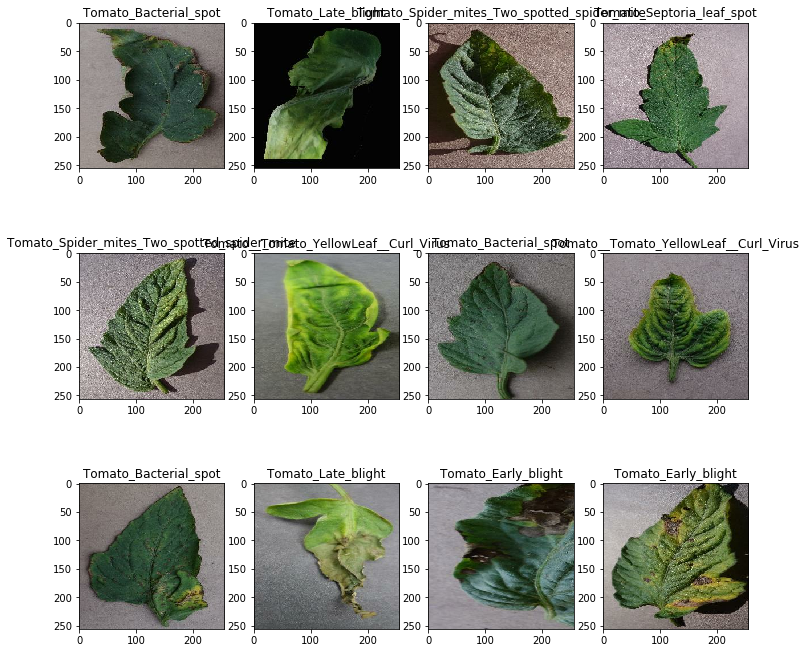

In [10]:
plt.figure(figsize = (12,12))
for image_batch, label_batch in dataset.take(1):
    for i in range(12):
        plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(class_names[label_batch[i]])

### Dataset should be bifurcated into 3 subsets, namely:

1. Training: Dataset to be used while training (80%)
2. Validation: Dataset to be tested against while training (10%)
3. Test: Dataset to be tested against after we trained a model (10%)

In [11]:
train_size = 0.8
len(dataset)*train_size

188.8

In [12]:
train_ds = dataset.take(188)

In [13]:
len(train_ds)

188

In [14]:
test_ds = dataset.skip(188)
len(test_ds)

48

In [15]:
val_size = 0.1
len(dataset)*val_size

23.6

In [16]:
val_ds = test_ds.take(23)
len(val_ds)

23

In [17]:
test_ds = test_ds.skip(23)
len(test_ds)

25

### Building the Model

#### Creating a Layer for Resizing and Normalization

In [18]:
resize_and_rescale = keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(scale=1./255)
])

In [19]:
resize_and_rescale

#### Data Augmentation

In [20]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
])

In [21]:
input_shape = (BATCH_SIZE,IMAGE_SIZE,IMAGE_SIZE, CHANNELS)
n_classes = 10

### Model Architecture

In [22]:
model = tf.keras.models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

In [23]:
model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (68, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (68, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (68, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (68, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (68, 62, 62, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (68, 60, 60, 64)         

### Compiling the Model

In [25]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics = ['accuracy'])

In [26]:
history = model.fit(train_ds, 
                    validation_data=val_ds,
                    epochs=15,
                    batch_size=BATCH_SIZE, 
                    verbose=1)

Epoch 1/15
188/188 [==============================] - 641s 3s/step - loss: 1.6400 - accuracy: 0.4119 - val_loss: 1.0032 - val_accuracy: 0.6368
Epoch 2/15
188/188 [==============================] - 644s 3s/step - loss: 0.8169 - accuracy: 0.7193 - val_loss: 0.5923 - val_accuracy: 0.7871
Epoch 3/15
188/188 [==============================] - 699s 4s/step - loss: 0.5307 - accuracy: 0.8134 - val_loss: 0.4285 - val_accuracy: 0.8427
Epoch 4/15
188/188 [==============================] - 708s 4s/step - loss: 0.4070 - accuracy: 0.8565 - val_loss: 0.3446 - val_accuracy: 0.8753
Epoch 5/15
188/188 [==============================] - 698s 4s/step - loss: 0.3301 - accuracy: 0.8855 - val_loss: 0.2710 - val_accuracy: 0.8983
Epoch 6/15
188/188 [==============================] - 665s 4s/step - loss: 0.2992 - accuracy: 0.8944 - val_loss: 0.2843 - val_accuracy: 0.8951
Epoch 7/15
188/188 [==============================] - 671s 4s/step - loss: 0.2581 - accuracy: 0.9143 - val_loss: 0.3514 - val_accuracy: 0.8689

In [27]:
scores = model.evaluate(test_ds)
scores

25/25 [==============================] - 33s 843ms/step - loss: 0.1916 - accuracy: 0.9447


[0.19162143766880035, 0.9446783065795898]

### Plotting the Accuracy and Loss Curves

In [28]:
history.params

{'verbose': 1, 'epochs': 15, 'steps': 188}

In [29]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [30]:
loss = history.history['loss']
acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']

In [31]:
EPOCHS = 15

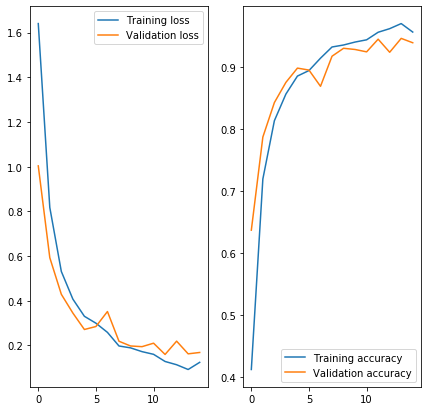

In [32]:
plt.figure(figsize=(7,7))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), loss, label = 'Training loss')
plt.plot(range(EPOCHS), val_loss, label = 'Validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), acc, label = 'Training accuracy')
plt.plot(range(EPOCHS), val_acc, label = 'Validation accuracy')
plt.legend()


In [33]:
history.history['loss']

[1.6400378942489624,
 0.8169435262680054,
 0.5307217240333557,
 0.40702706575393677,
 0.3300735354423523,
 0.29921185970306396,
 0.2580934166908264,
 0.19716858863830566,
 0.18881279230117798,
 0.1718713343143463,
 0.15988647937774658,
 0.1278364509344101,
 0.11327022314071655,
 0.09192809462547302,
 0.12396290898323059]

In [34]:
history.history['accuracy']

[0.4119211435317993,
 0.7193366885185242,
 0.8134386539459229,
 0.856461226940155,
 0.8854818344116211,
 0.8943992257118225,
 0.9143460392951965,
 0.9324155449867249,
 0.9356226325035095,
 0.9403942227363586,
 0.9439924955368042,
 0.9561952352523804,
 0.9619837403297424,
 0.9701971411705017,
 0.9565081596374512]

### Run prediction on a sample image

In [35]:
for data in dataset.take(1):
    print(data)

(<tf.Tensor: shape=(68, 256, 256, 3), dtype=float32, numpy=
array([[[[114., 113., 108.],
         [113., 112., 107.],
         [111., 110., 105.],
         ...,
         [148., 149., 144.],
         [151., 152., 147.],
         [153., 154., 149.]],

        [[118., 117., 112.],
         [113., 112., 107.],
         [107., 106., 101.],
         ...,
         [148., 149., 144.],
         [151., 152., 147.],
         [153., 154., 149.]],

        [[115., 114., 109.],
         [107., 106., 101.],
         [ 98.,  97.,  92.],
         ...,
         [148., 149., 144.],
         [150., 151., 146.],
         [151., 152., 147.]],

        ...,

        [[ 84.,  85.,  80.],
         [ 82.,  83.,  78.],
         [ 84.,  85.,  80.],
         ...,
         [127., 133., 123.],
         [128., 134., 124.],
         [129., 135., 125.]],

        [[ 85.,  86.,  81.],
         [ 84.,  85.,  80.],
         [ 87.,  88.,  83.],
         ...,
         [127., 133., 123.],
         [127., 133., 123.],
       

In [36]:
for images_batch, labels_batch in dataset.take(1):
    #plt.imshow(images_batch[0].numpy().astype('uint8'))
    print(f'Actual Label:', class_names[labels_batch[0]])
    
    batch_prediction = model.predict(images_batch)
    print('Predicted Label:', class_names[np.argmax(batch_prediction[0])])

Actual Label: Tomato_healthy
3/3 [==============================] - 1s 226ms/step
Predicted Label: Tomato_healthy


### Write a function for inference

In [37]:
for image_batch, batch_label in dataset.take(1):
    image_batch = tf.keras.preprocessing.image.img_to_array(image_batch[1].numpy())
    print(image_batch.shape)

(256, 256, 3)


1/1 [==============================] - 0s 51ms/step
7
1/1 [==============================] - 0s 54ms/step
Tomato__Tomato_YellowLeaf__Curl_Virus
1/1 [==============================] - 0s 53ms/step
[[6.6236318e-03 4.7635191e-04 1.2234550e-02 1.2900782e-04 6.6859217e-04
  2.1221673e-01 2.9758176e-01 4.7006944e-01 4.5424451e-09 3.1785437e-09]]
0.47006944 2


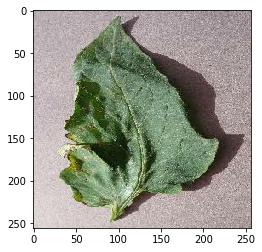

In [38]:
for image, label in dataset.take(1):
    image_use = image[1]
    image_use = tf.expand_dims(image_use,0)
    plt.imshow(image[1].numpy().astype('uint8'))
    print(np.argmax(model.predict(image_use.numpy())))
    print(class_names[np.argmax(model.predict(image_use.numpy()))])
    predictions = model.predict(image_use.numpy())
    print(predictions)
    print(np.max(predictions[0]),2)

In [39]:
def predict(model, img):
    image_array = tf.keras.preprocessing.image.img_to_array(img)
    image_array = tf.expand_dims(image_array,0)
    
    predictions = model.predict(image_array)
    predicted_class = class_names[np.argmax(predictions)]
    confidence = round(100* np.max(predictions[0]),2)
    return predicted_class, confidence

### Now run inference on few sample images

1/1 [==============================] - 0s 49ms/step


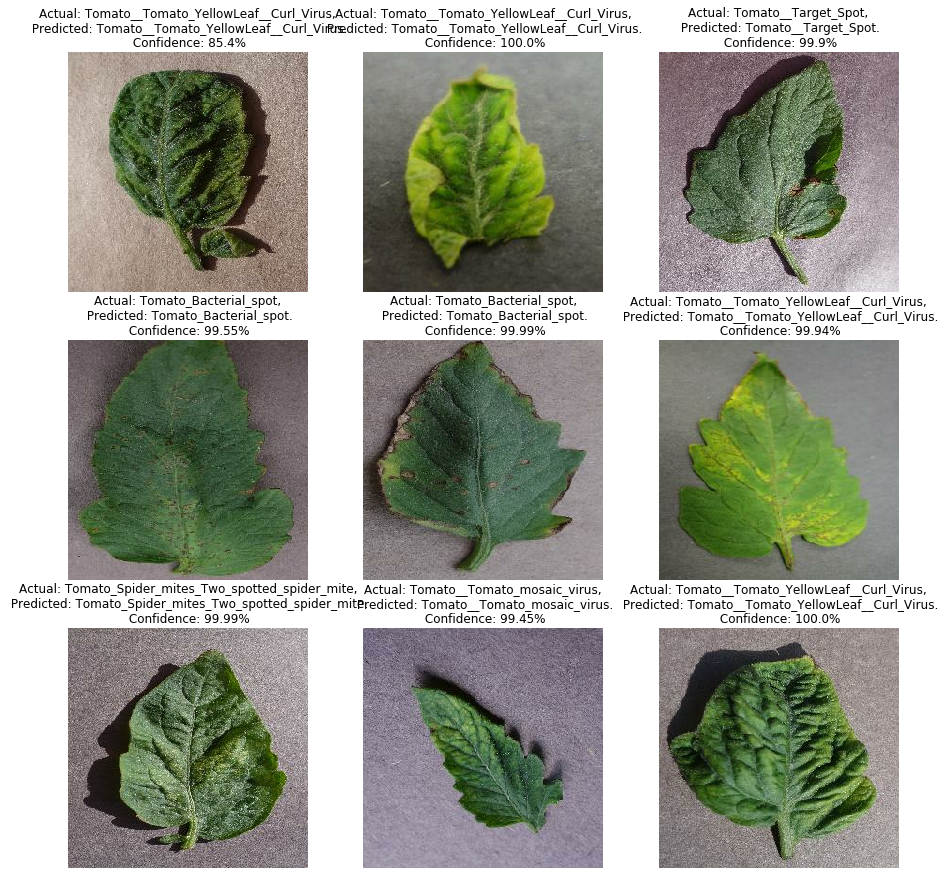

In [40]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")